# DS0106 MachineLearn L1

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Load in the data

In [2]:
realestate = pd.read_csv('data/realestate.csv')

In [3]:
realestate.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

# Data Wrangling

In [4]:
x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# The Y data will be the target variable, what I am trying to predict

In [5]:
y = realestate['Y house price of unit area']

# Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


In [8]:
lm = LinearRegression()

In [9]:
lm.fit(x_train, y_train)

LinearRegression()

# The above code is not giving proper output according to curriculum 

# Examine Predictions

In [10]:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

# Graph the y_test against the predictions

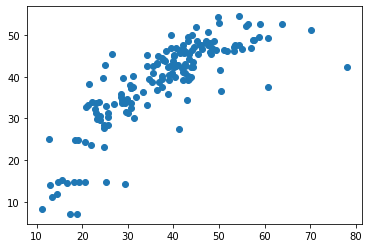

In [11]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [12]:
print("Score:", lm.score(x_test, y_test))

Score: 0.6442380845121716


# Examining Error

# Mean Absolute Error (MAE)

# the average amount of error between the prediction and the real data

In [13]:
metrics.mean_absolute_error(y_test, predictions)

5.550201321415488

# Mean Squared Error (MSE)

# square of the absolute error from above

In [14]:
metrics.mean_squared_error(y_test, predictions)

54.3757285449222

# Root Mean Squared Error (RMSE)

# square root of the mean squared error you saw above

In [15]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.373990001683091

# K-fold cross validation

In [16]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

TypeError: __init__() takes from 1 to 2 positional arguments but 4 were given

In [39]:
print(cross_val_score(lm, x,y, cv=3))

[0.62051774 0.50393467 0.55970703]


### Conclusion

According to the cross-validation scores reviewing the accuracies, the first model, 62%, the second model, 50%, and the third model, 56%, state that these models are most likely sub-optimal. 